# Analyse et Prédiction de la Progression du Diabète

## Introduction

Le diabète est une maladie chronique qui affecte des millions de personnes à travers le monde. Il est caractérisé par des niveaux élevés de glucose dans le sang et peut entraîner de graves complications si non pris en charge correctement. Le dataset utilisé dans ce projet, connu sous le nom de Pima Indians Diabetes dataset, est issu d'une étude réalisée par le National Institute of Diabetes and Digestive and Kidney Diseases. Ce dataset contient des données médicales relatives aux femmes d'origine amérindienne Pima, âgées d'au moins 21 ans.

L'objectif de ce projet est double : d'une part, explorer et analyser les données pour mieux comprendre les facteurs associés au diabète, et d'autre part, construire des modèles d'apprentissage automatique capables de prédire la présence de diabète chez les patients en fonction de leurs caractéristiques médicales.

### Objectifs

1. **Exploration des Données** :
   - Examiner la distribution des différentes caractéristiques médicales (âge, IMC, niveau de glucose, etc.).
   - Analyser les corrélations entre ces caractéristiques et la présence de diabète.
   
2. **Préparation des Données** :
   - Traiter les valeurs manquantes et les données aberrantes.
   - Normaliser et standardiser les caractéristiques pour une meilleure performance des modèles.
   
3. **Construction de Modèles de Prédiction** :
   - Entraîner plusieurs modèles de classification pour prédire la présence de diabète.
   - Évaluer les performances des modèles à l'aide de métriques appropriées (accuracy, précision, rappel, F1-score, AUC-ROC).

4. **Interprétation et Visualisation des Résultats** :
   - Utiliser des techniques avancées pour interpréter les résultats des modèles et comprendre l'importance des différentes caractéristiques.
   - Visualiser les performances des modèles et les corrélations importantes à travers des graphiques et des tableaux.

### Dataset

Le dataset Pima Indians Diabetes contient les attributs suivants :
- **Pregnancies** : Nombre de grossesses
- **Glucose** : Concentration en glucose
- **BloodPressure** : Pression artérielle diastolique (mm Hg)
- **SkinThickness** : Épaisseur de la peau du triceps (mm)
- **Insulin** : Insuline sérique (mu U/ml)
- **BMI** : Indice de masse corporelle (poids en kg/(taille en m)^2)
- **DiabetesPedigreeFunction** : Fonction de pedigree diabétique
- **Age** : Âge (années)
- **Outcome** : Variable cible (0: non diabétique, 1: diabétique)

Nous allons explorer ces attributs, traiter les données, et construire des modèles pour prédire la présence de diabète. Ce projet nous permettra non seulement de développer des compétences en analyse de données et en apprentissage automatique, mais également de contribuer à la compréhension d'une maladie importante et de ses facteurs de risque.

### Plan

1. **Préparation des Données** :
   - Chargement et exploration des données
   - Nettoyage et prétraitement des données

2. **Exploration et Visualisation des Données** :
   - Analyse exploratoire des données
   - Visualisation des corrélations et des distributions

3. **Construction et Évaluation des Modèles** :
   - Division des données en ensembles d'entraînement et de test
   - Entraînement de plusieurs modèles de classification
   - Évaluation des performances des modèles

4. **Interprétation et Visualisation des Résultats** :
   - Interprétation des résultats des modèles
   - Visualisation des performances et des caractéristiques importantes



In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:


# Charger les données
data_url = 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'
data = pd.read_csv(data_url)


print("On affiche les premières lignes du dataset:\n")
print(data.head())


print("\nInformations sur le dataset:\n")
print(data.info())


print("\nResultat de la description du dataset:\n")
print(data.describe())

On affiche les premières lignes du dataset:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Informations sur le dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnanc

In [17]:
# Pour les valeurs manquantes on met NaN
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

# On va combler les valeurs manquantes on utilisant la médiane
data.fillna(data.median(), inplace=True)

# On check les valeurs manquantes si il en reste
print("\nVerification reste de valeurs manquantes après traitement 1:\n")
print(data.isnull().sum())

# On va normaliser et standardiser les données pour une meilleure etude
features = data.drop('Outcome', axis=1)
target = data['Outcome']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convertir en DataFrame pour une meilleure lisibilité
features_scaled = pd.DataFrame(features_scaled, columns=features.columns)

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

print(f"Entraînement: {X_train.shape}, Test: {X_test.shape}")


Verification reste de valeurs manquantes après traitement 1:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Aperçu des caractéristiques normalisées:

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.866045      -0.031990       0.670643 -0.181541  0.166619   
1    -0.844885 -1.205066      -0.528319      -0.012301 -0.181541 -0.852200   
2     1.233880  2.016662      -0.693761      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.073567      -0.528319      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.504422      -2.679076       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.6

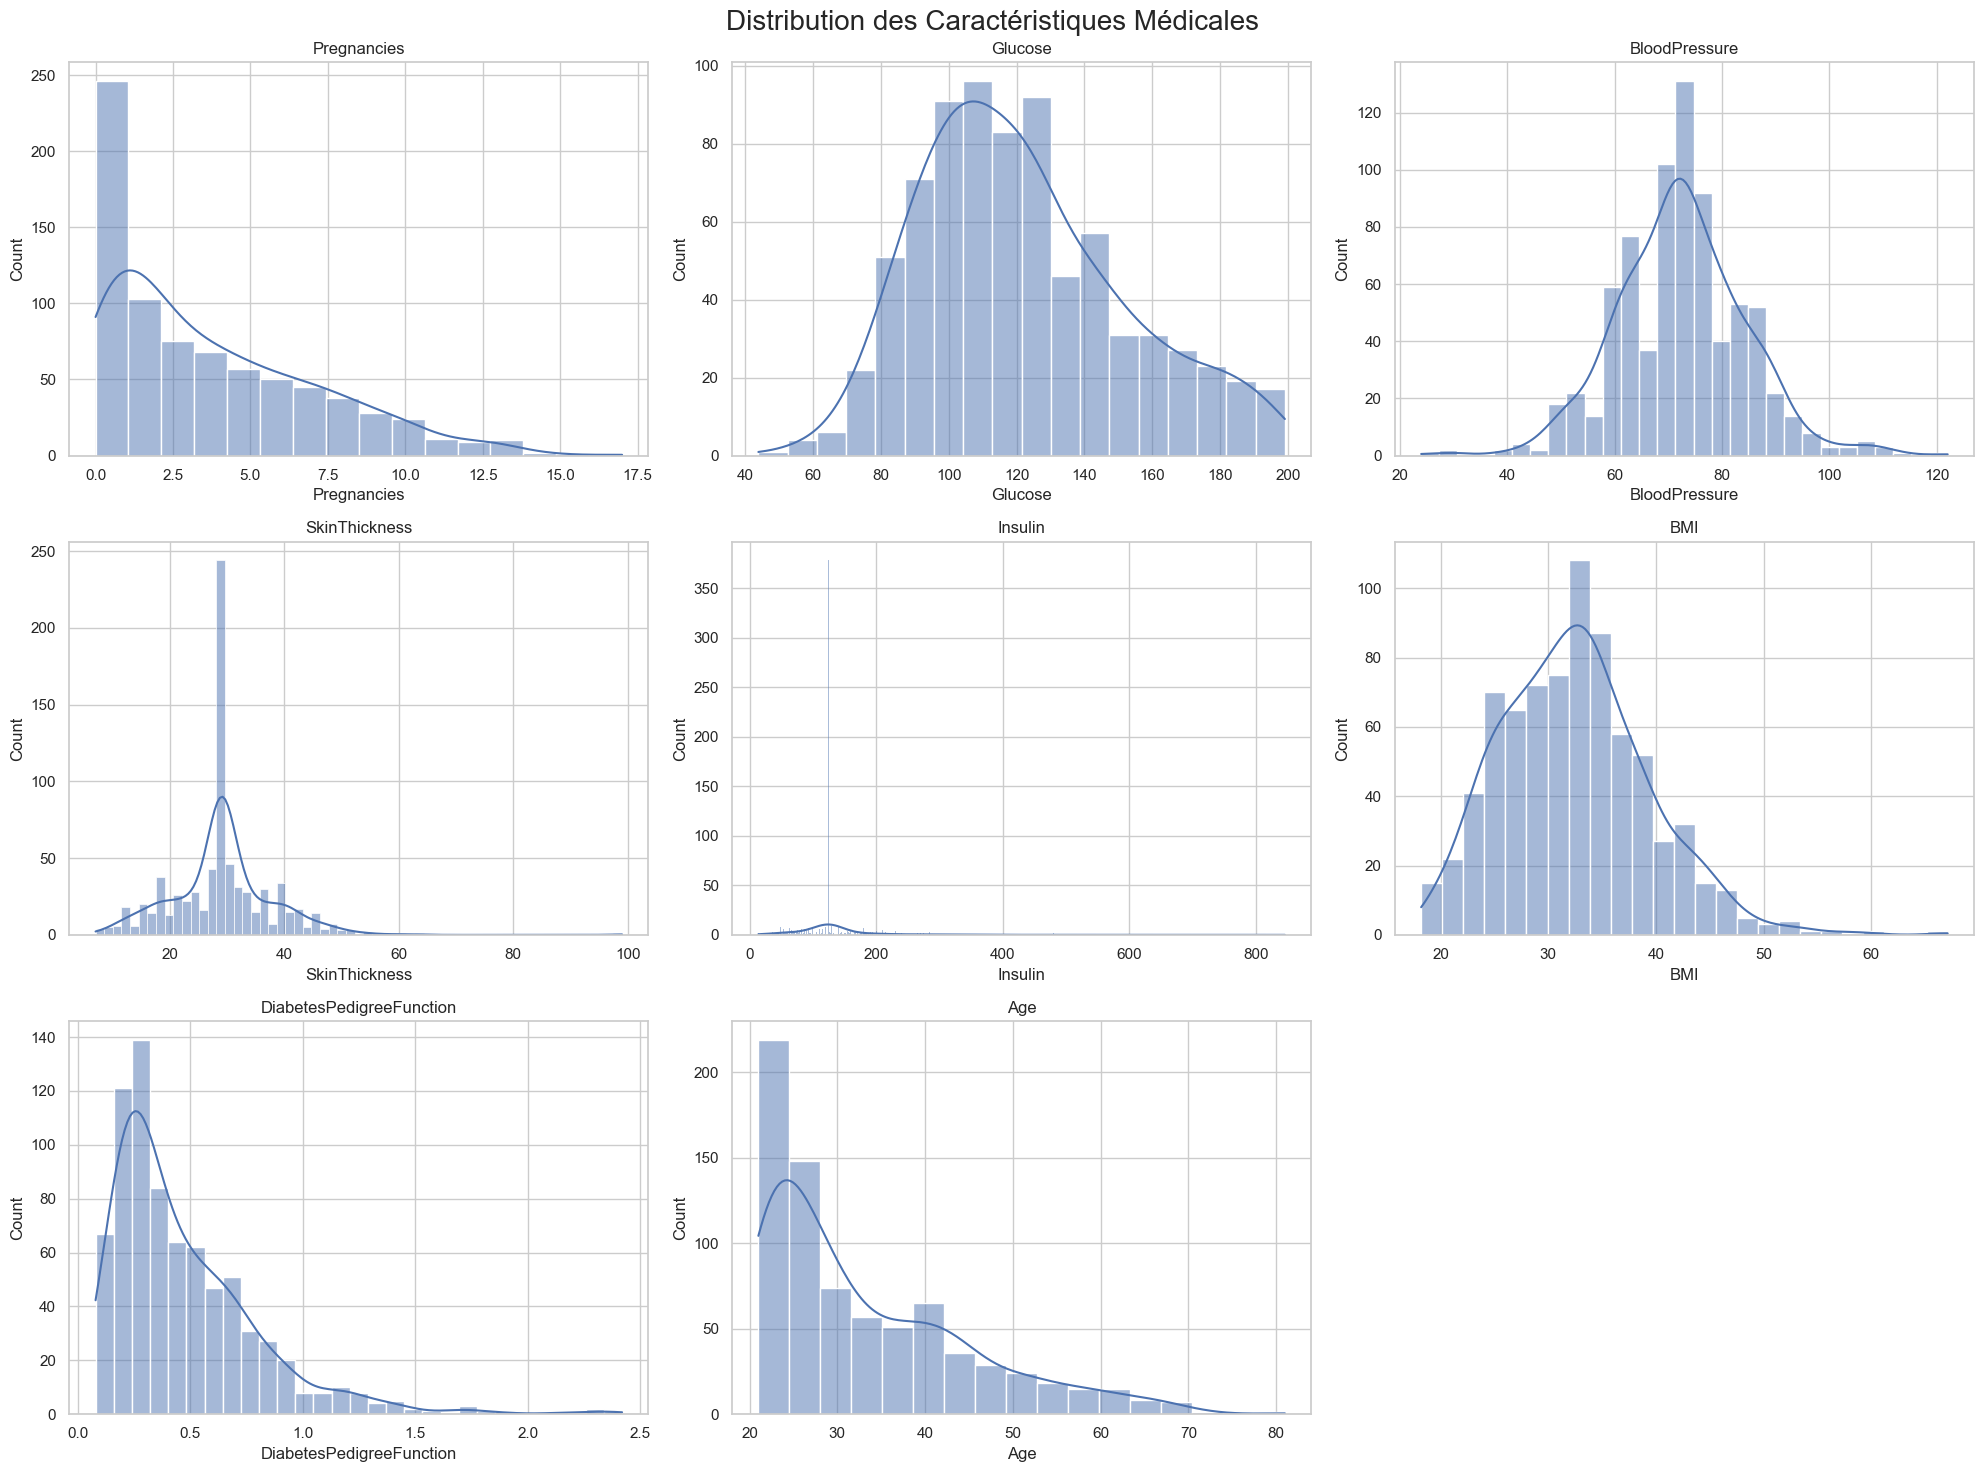

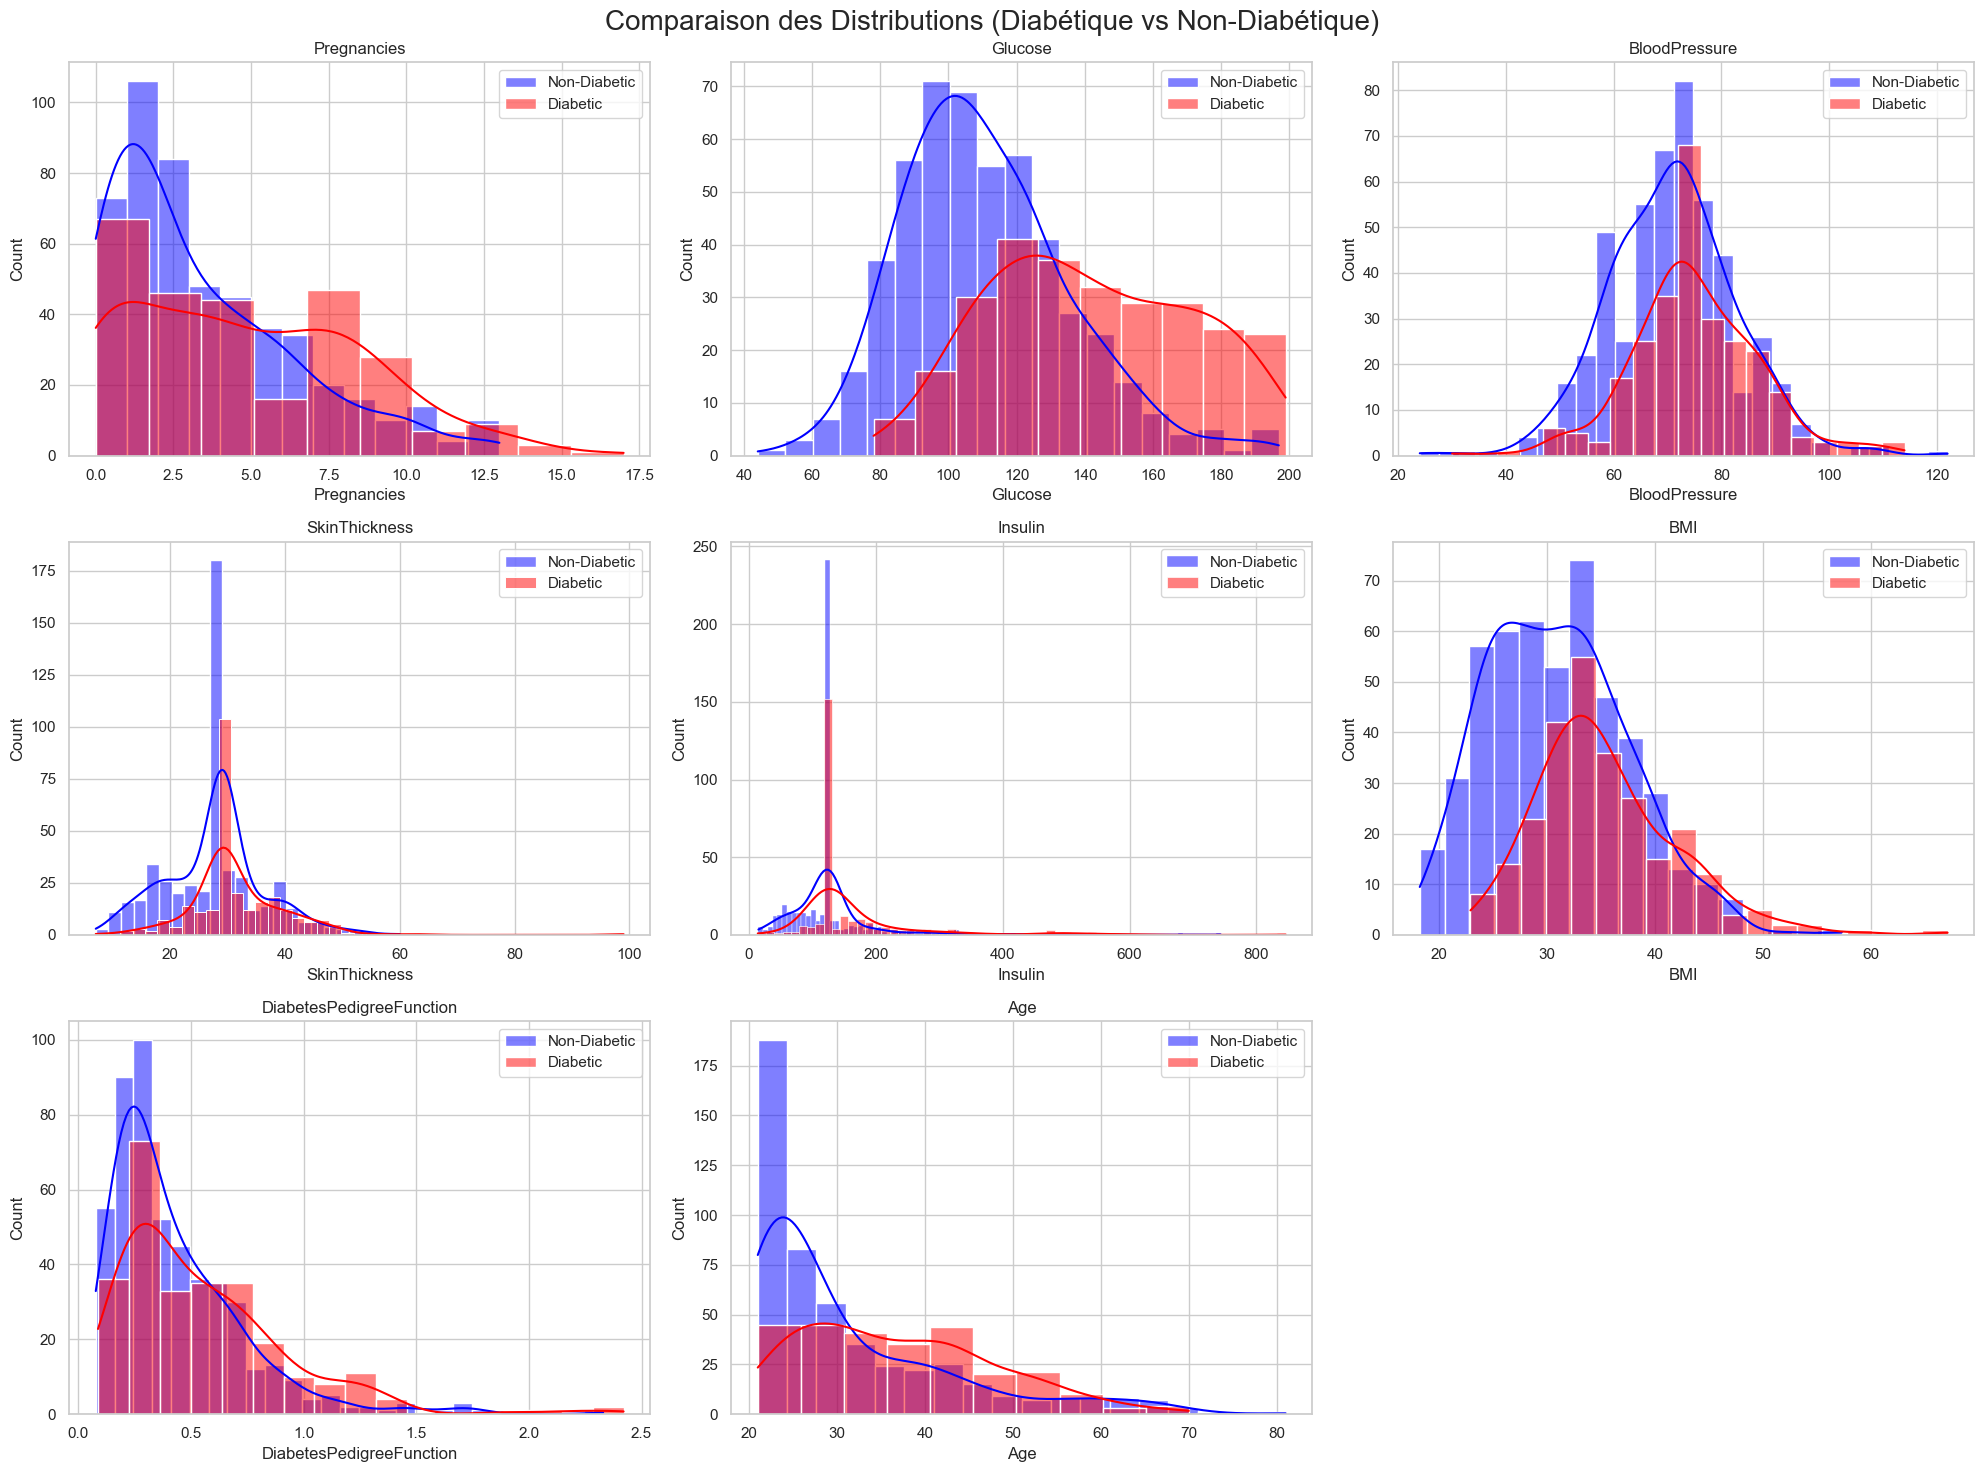

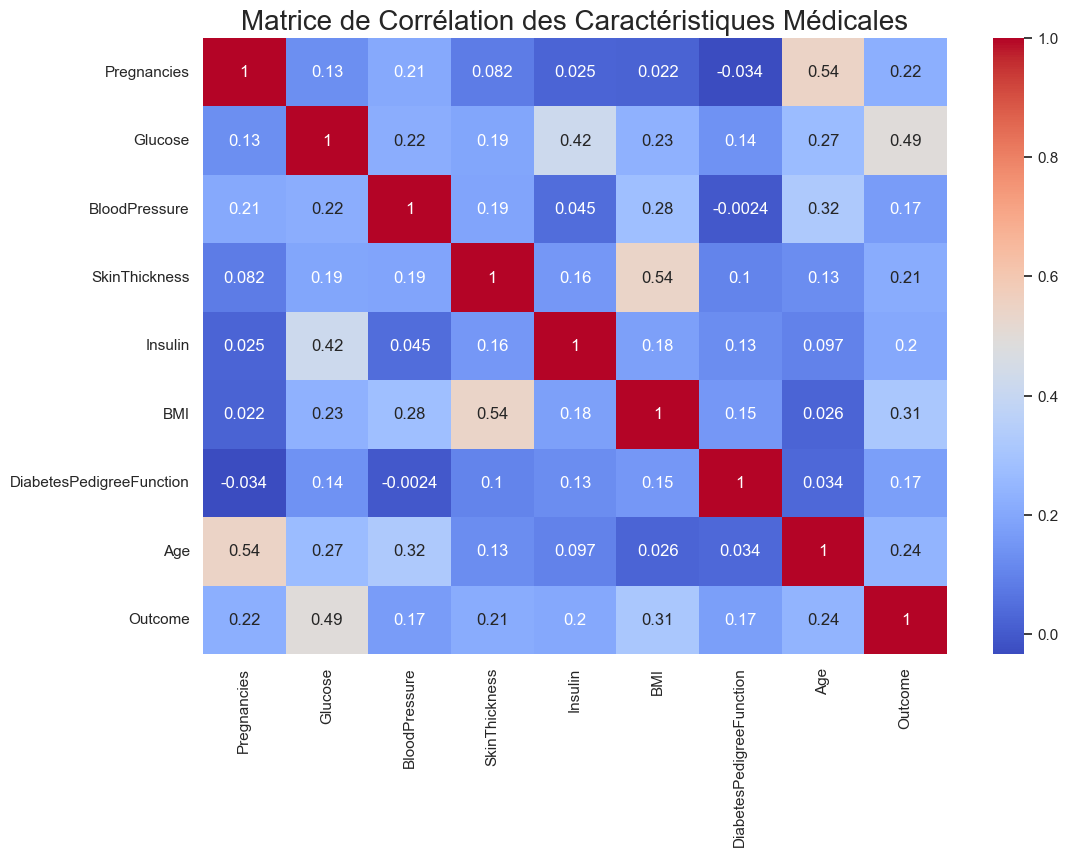

In [18]:

sns.set(style="whitegrid")

# Distribution des caractéristiques
def plot_distribution(data, columns, title):
    plt.figure(figsize=(20, 15))
    for i, column in enumerate(columns, 1):
        plt.subplot(3, 3, i)
        sns.histplot(data[column], kde=True)
        plt.title(column)
    plt.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.show()

# Comparaison des distributions pour les patients diabétiques et non diabétiques
def plot_comparison(data, columns, target, title):
    plt.figure(figsize=(20, 15))
    for i, column in enumerate(columns, 1):
        plt.subplot(3, 3, i)
        sns.histplot(data[data[target] == 0][column], kde=True, color='blue', label='Non-Diabetic')
        sns.histplot(data[data[target] == 1][column], kde=True, color='red', label='Diabetic')
        plt.title(column)
        plt.legend()
    plt.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.show()

# On trace la matrice de corrélation pour voir les relations entre les caractéristiques
def plot_correlation_matrix(data, title):
    plt.figure(figsize=(12, 8))
    corr_matrix = data.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(title, fontsize=20)
    plt.show()


plot_distribution(data, data.columns[:-1], 'Distribution des Caractéristiques Médicales')

plot_comparison(data, data.columns[:-1], 'Outcome', 'Comparaison des Distributions (Diabétique vs Non-Diabétique)')

plot_correlation_matrix(data, 'Matrice de Corrélation des Caractéristiques Médicales')

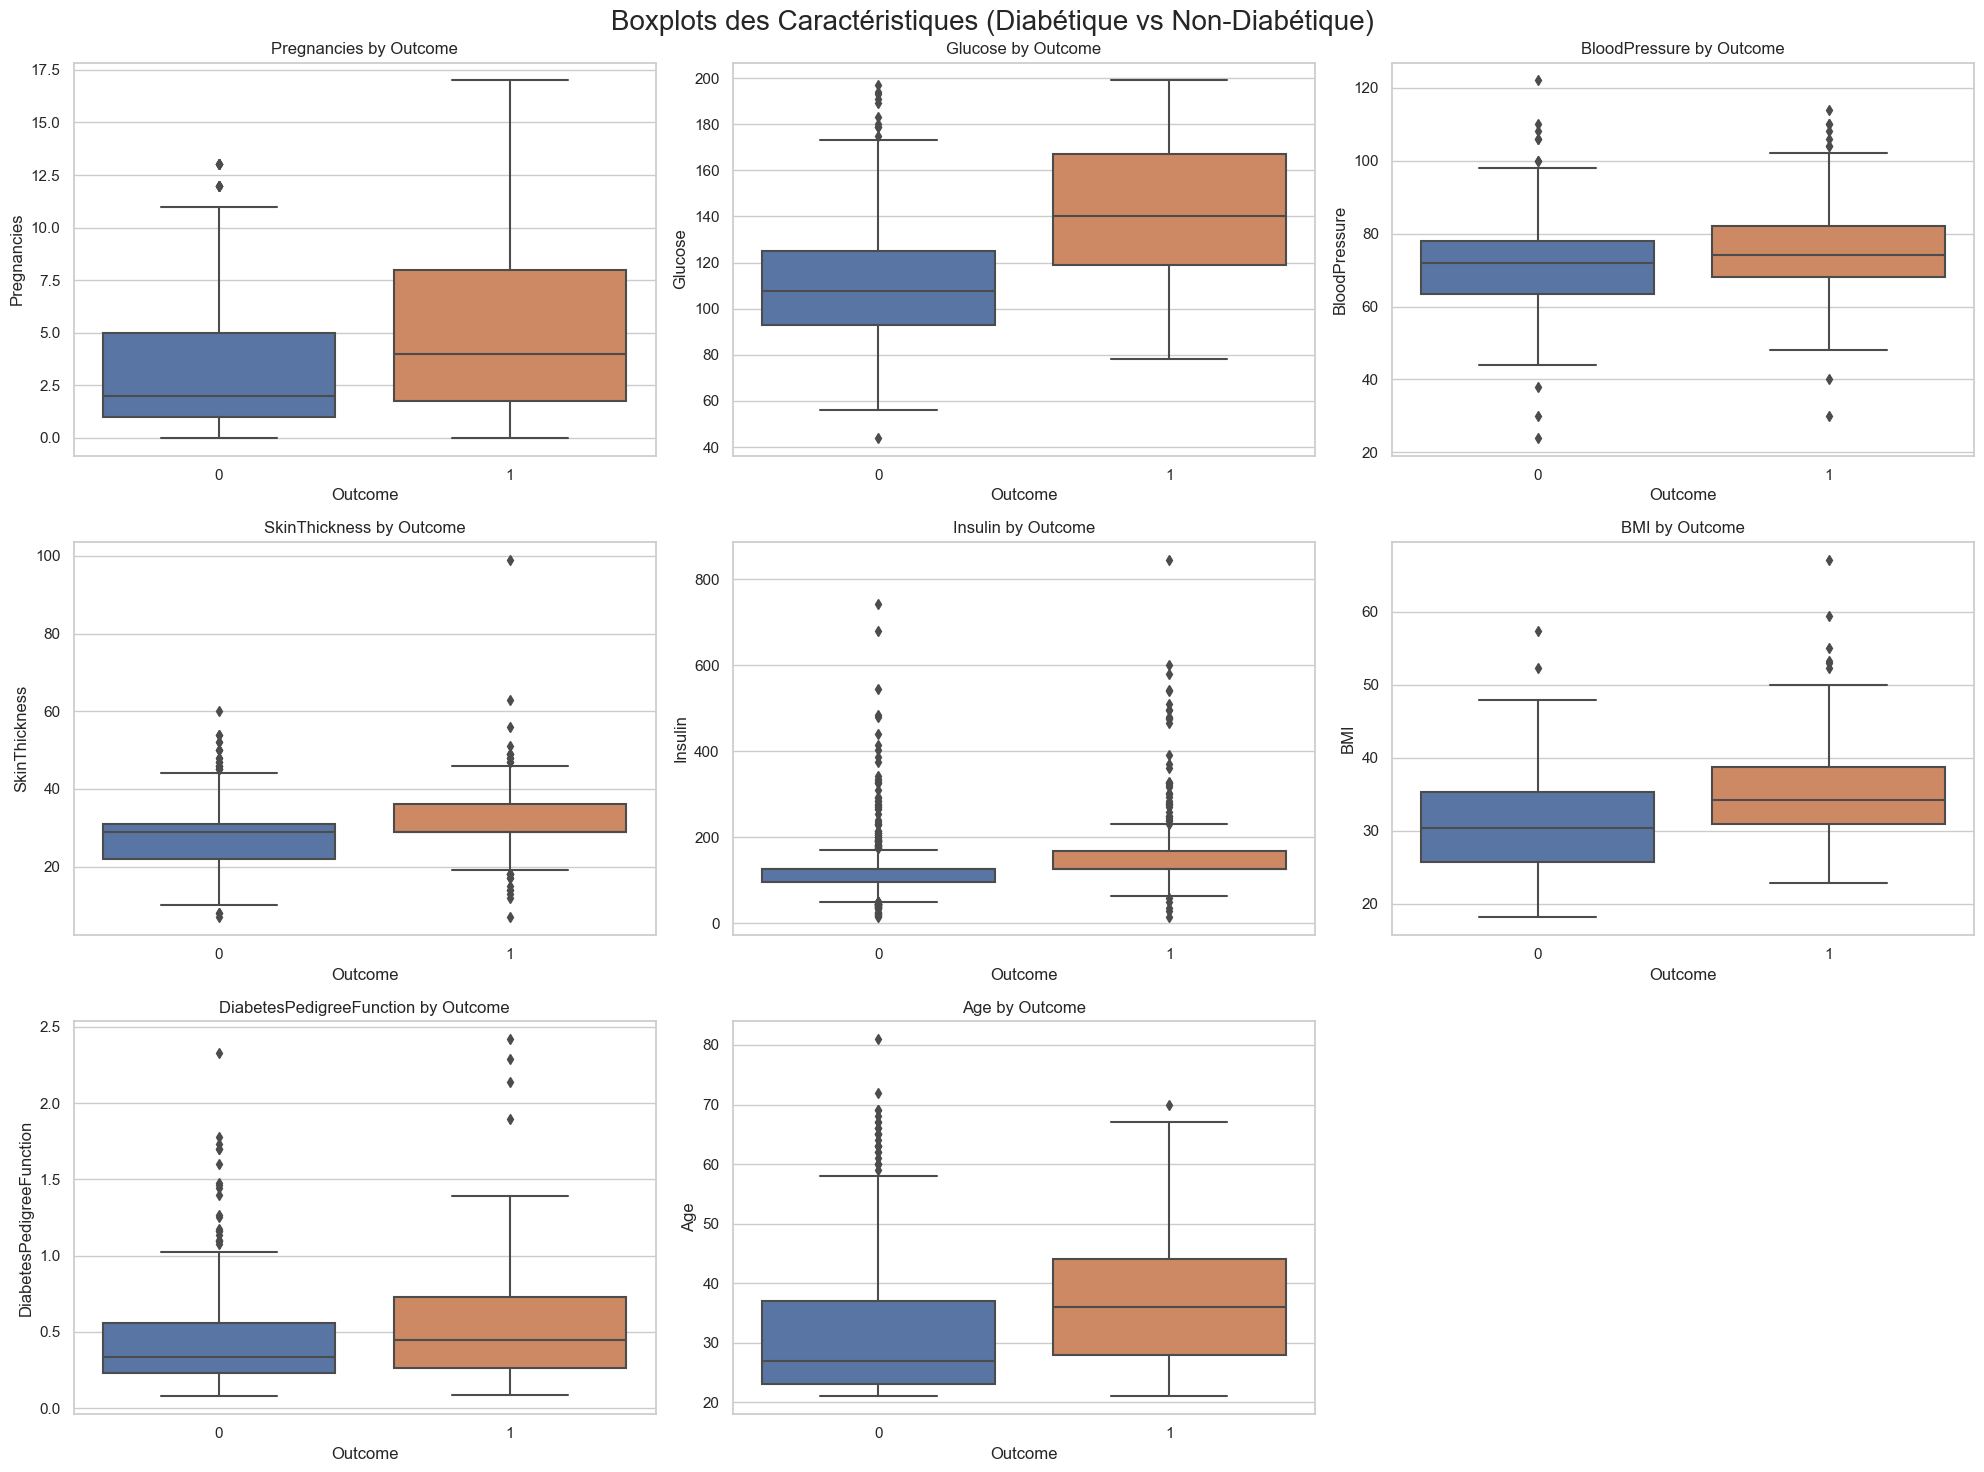

In [19]:
# Boxplots pour comparer les distributions des caractéristiques entre les patients diabétiques et non-diabétiques
def plot_boxplots(data, columns, target, title):
    plt.figure(figsize=(20, 15))
    for i, column in enumerate(columns, 1):
        plt.subplot(3, 3, i)
        sns.boxplot(x=target, y=column, data=data)
        plt.title(f'{column} by {target}')
    plt.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.show()

plot_boxplots(data, data.columns[:-1], 'Outcome', 'Boxplots des Caractéristiques (Diabétique vs Non-Diabétique)')

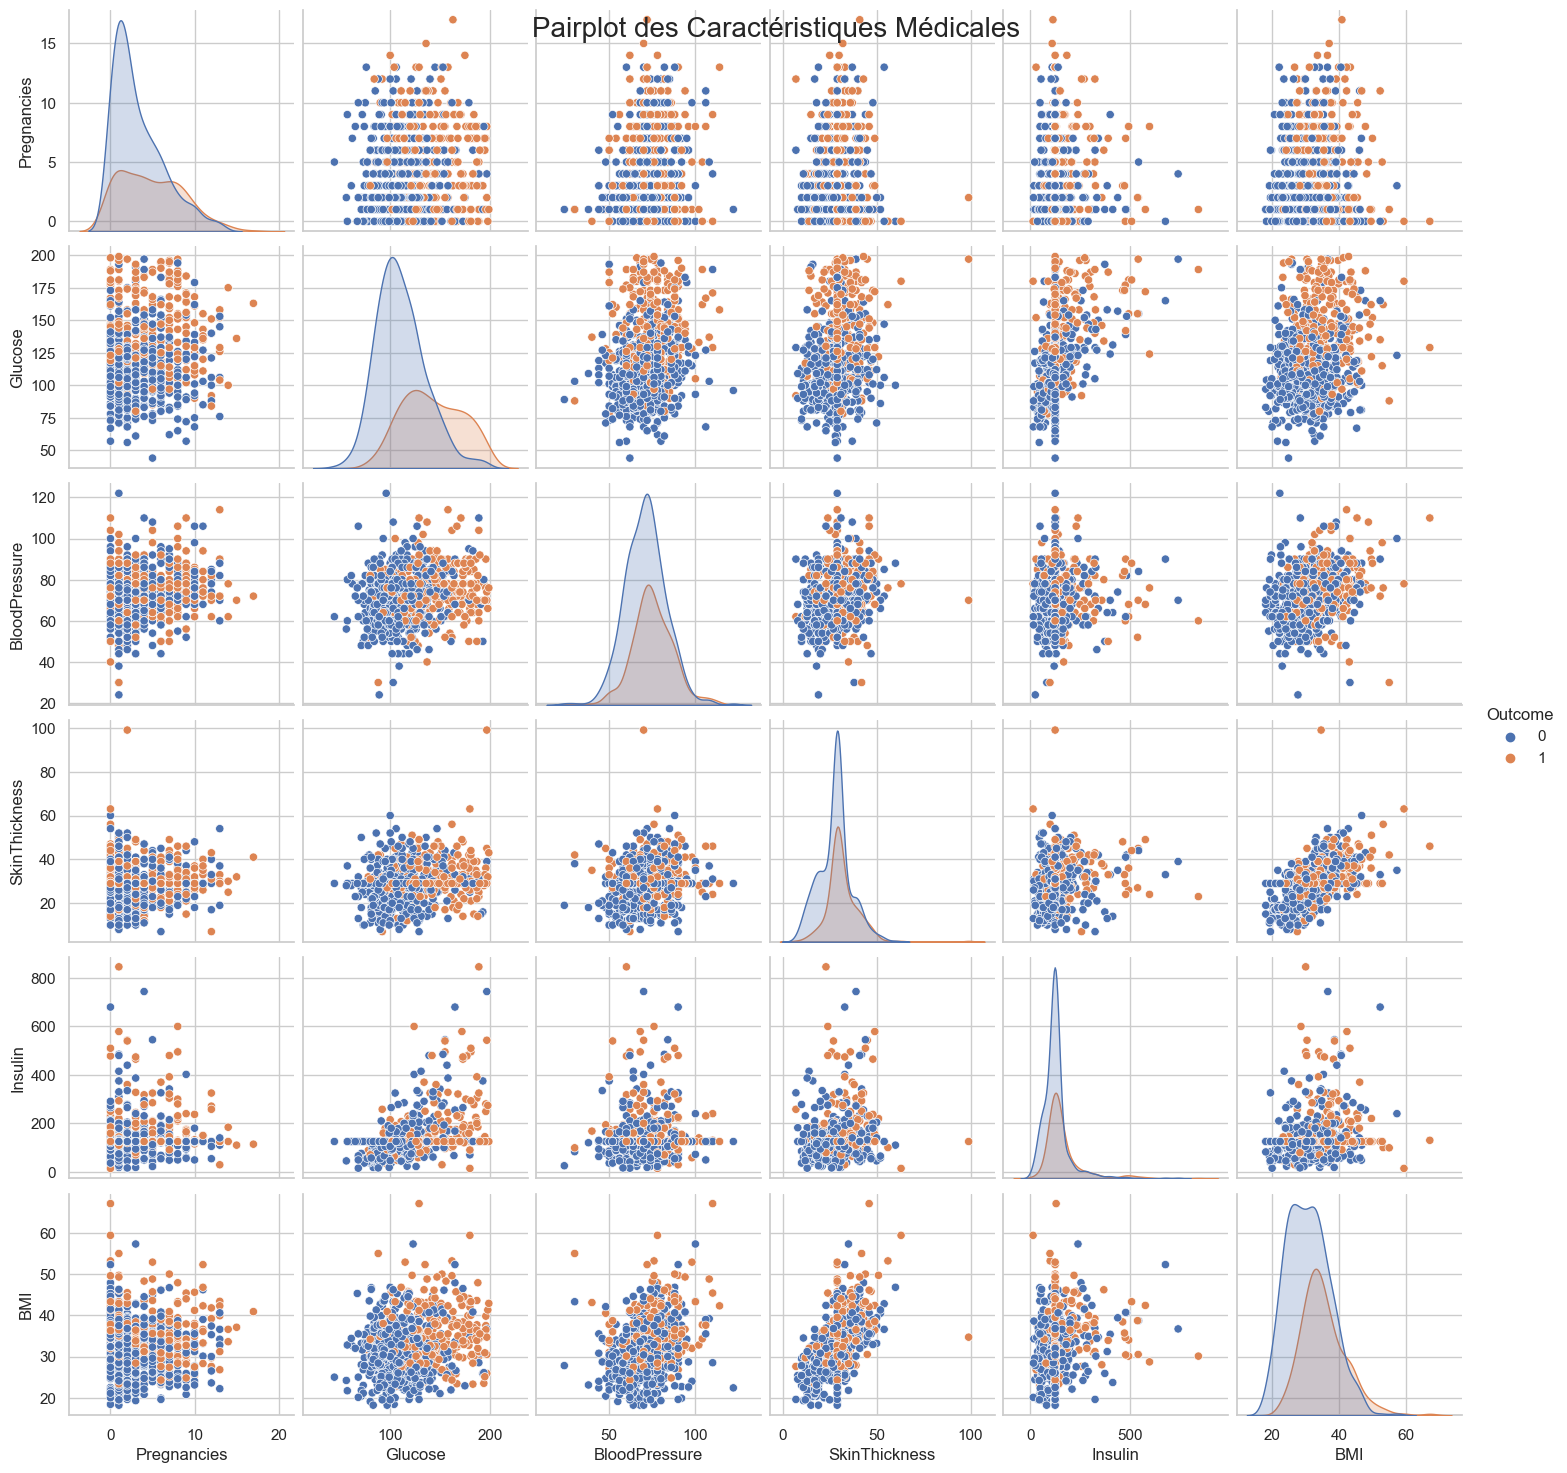

In [20]:
# Pairplot pour visualiser les relations entre plusieurs caractéristiques
def plot_pairplot(data, columns, target, title):
    sns.pairplot(data[columns + [target]], hue=target, diag_kind='kde')
    plt.suptitle(title, fontsize=20)
    plt.show()

plot_pairplot(data, ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'], 'Outcome', 'Pairplot des Caractéristiques Médicales')

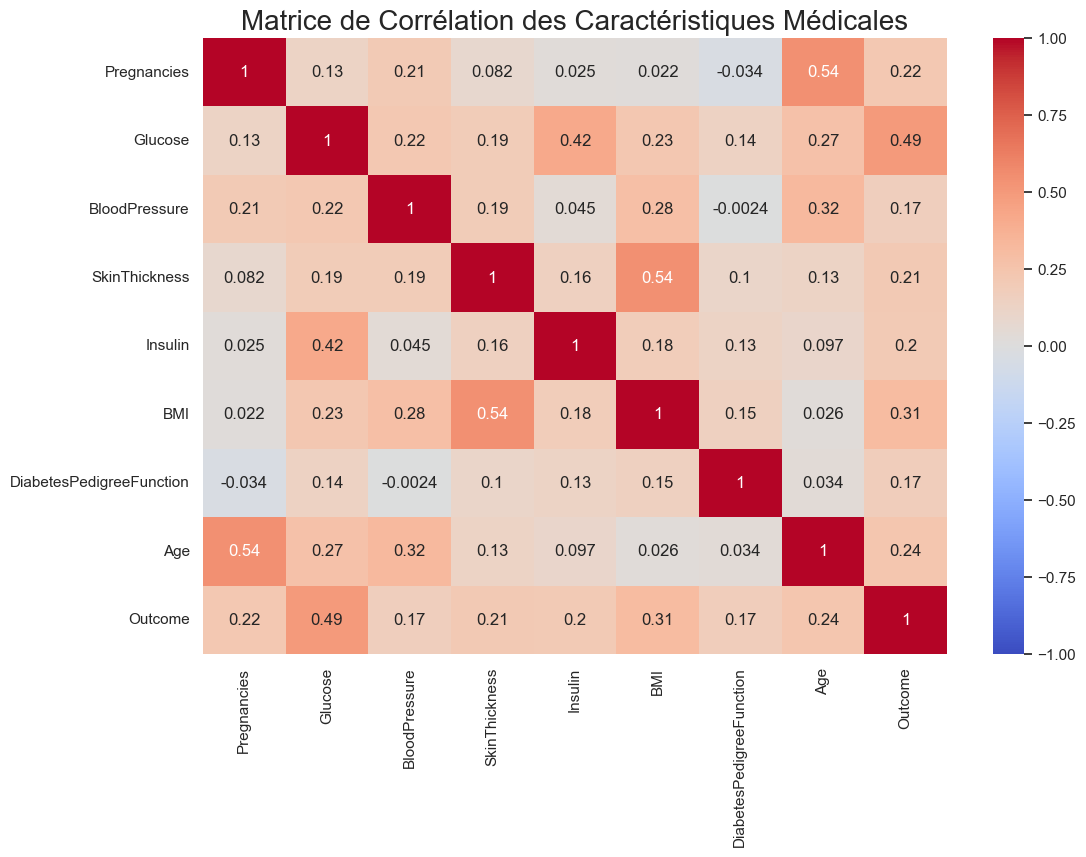

In [21]:
# Heatmap 
def plot_heatmap(data, title):
    plt.figure(figsize=(12, 8))
    corr_matrix = data.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title, fontsize=20)
    plt.show()

plot_heatmap(data, 'Matrice de Corrélation des Caractéristiques Médicales')

Model: Logistic Regression
Accuracy: 0.7532467532467533
AUC-ROC: 0.8229568411386594
Classification Report:
{'0': {'precision': 0.7961165048543689, 'recall': 0.8282828282828283, 'f1-score': 0.8118811881188118, 'support': 99.0}, '1': {'precision': 0.6666666666666666, 'recall': 0.6181818181818182, 'f1-score': 0.6415094339622642, 'support': 55.0}, 'accuracy': 0.7532467532467533, 'macro avg': {'precision': 0.7313915857605178, 'recall': 0.7232323232323232, 'f1-score': 0.7266953110405381, 'support': 154.0}, 'weighted avg': {'precision': 0.7498844197873323, 'recall': 0.7532467532467533, 'f1-score': 0.751034133062902, 'support': 154.0}}
Confusion Matrix:


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


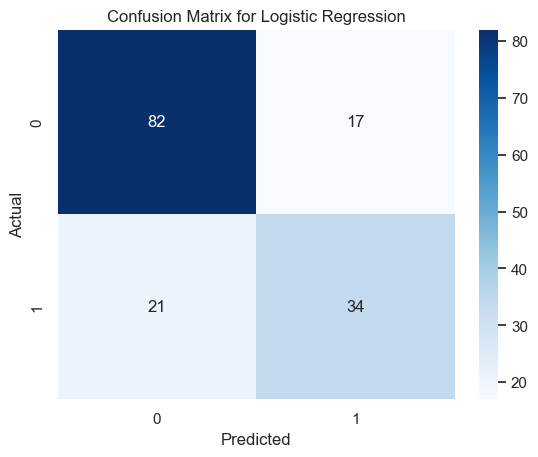

Model: Decision Tree
Accuracy: 0.7077922077922078
AUC-ROC: 0.6838383838383839
Classification Report:
{'0': {'precision': 0.7755102040816326, 'recall': 0.7676767676767676, 'f1-score': 0.7715736040609136, 'support': 99.0}, '1': {'precision': 0.5892857142857143, 'recall': 0.6, 'f1-score': 0.5945945945945946, 'support': 55.0}, 'accuracy': 0.7077922077922078, 'macro avg': {'precision': 0.6823979591836735, 'recall': 0.6838383838383838, 'f1-score': 0.683084099327754, 'support': 154.0}, 'weighted avg': {'precision': 0.7090014577259475, 'recall': 0.7077922077922078, 'f1-score': 0.7083668149657996, 'support': 154.0}}
Confusion Matrix:


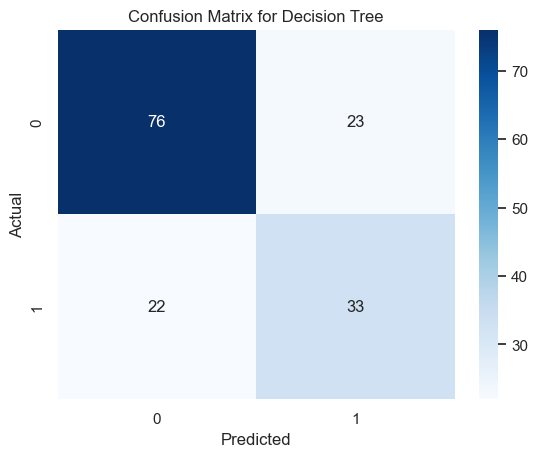

Model: Random Forest
Accuracy: 0.7467532467532467
AUC-ROC: 0.8372819100091827
Classification Report:
{'0': {'precision': 0.8061224489795918, 'recall': 0.797979797979798, 'f1-score': 0.8020304568527918, 'support': 99.0}, '1': {'precision': 0.6428571428571429, 'recall': 0.6545454545454545, 'f1-score': 0.6486486486486486, 'support': 55.0}, 'accuracy': 0.7467532467532467, 'macro avg': {'precision': 0.7244897959183674, 'recall': 0.7262626262626263, 'f1-score': 0.7253395527507203, 'support': 154.0}, 'weighted avg': {'precision': 0.7478134110787172, 'recall': 0.7467532467532467, 'f1-score': 0.7472512396370264, 'support': 154.0}}
Confusion Matrix:


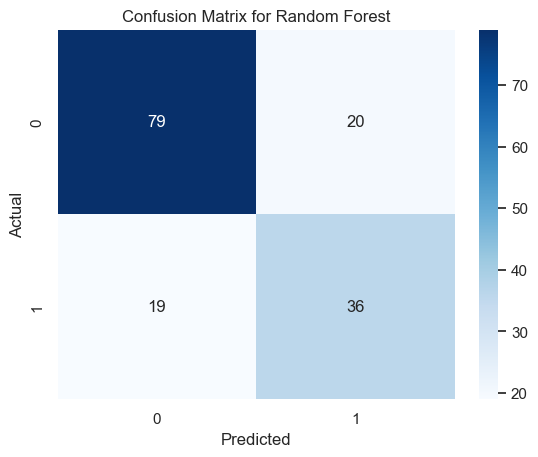

Model: XGBoost
Accuracy: 0.7142857142857143
AUC-ROC: 0.7827364554637282
Classification Report:
{'0': {'precision': 0.8021978021978022, 'recall': 0.7373737373737373, 'f1-score': 0.768421052631579, 'support': 99.0}, '1': {'precision': 0.5873015873015873, 'recall': 0.6727272727272727, 'f1-score': 0.6271186440677966, 'support': 55.0}, 'accuracy': 0.7142857142857143, 'macro avg': {'precision': 0.6947496947496947, 'recall': 0.705050505050505, 'f1-score': 0.6977698483496878, 'support': 154.0}, 'weighted avg': {'precision': 0.7254491540205826, 'recall': 0.7142857142857143, 'f1-score': 0.7179559067159424, 'support': 154.0}}
Confusion Matrix:


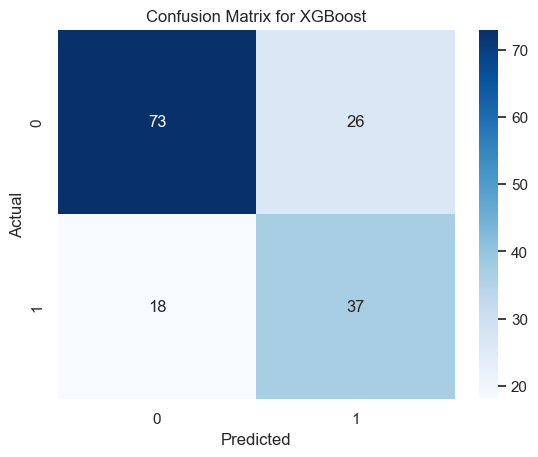

Model: Neural Network
Accuracy: 0.7337662337662337
AUC-ROC: 0.796694214876033
Classification Report:
{'0': {'precision': 0.8085106382978723, 'recall': 0.7676767676767676, 'f1-score': 0.7875647668393781, 'support': 99.0}, '1': {'precision': 0.6166666666666667, 'recall': 0.6727272727272727, 'f1-score': 0.6434782608695652, 'support': 55.0}, 'accuracy': 0.7337662337662337, 'macro avg': {'precision': 0.7125886524822695, 'recall': 0.7202020202020202, 'f1-score': 0.7155215138544717, 'support': 154.0}, 'weighted avg': {'precision': 0.7399949341438703, 'recall': 0.7337662337662337, 'f1-score': 0.7361053004215878, 'support': 154.0}}
Confusion Matrix:


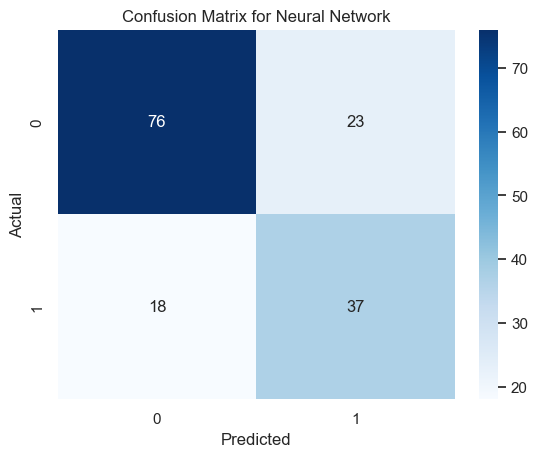

In [22]:
# Entrainement des différens modèles
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "Neural Network": MLPClassifier(max_iter=500)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = model.score(X_test, y_test)
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results[name] = {
        "accuracy": accuracy,
        "auc_roc": auc_roc,
        "classification_report": report,
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }


for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"AUC-ROC: {result['auc_roc']}")
    print("Classification Report:")
    print(result['classification_report'])
    print("Confusion Matrix:")
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [23]:
# Sauvegarder le scaler
joblib.dump(scaler, '../models/scaler.pkl')

# Sauvegarder les modèles entraînés
for name, model in models.items():
    model_filename = f'../models/{name.lower().replace(" ", "_")}.pkl'
    joblib.dump(model, model_filename)

print("Sauvegarde OK !")

Sauvegarde OK !
